In [1]:
import pdb
import sys
from scipy.io import readsav
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sys.path.append("..")

from pseudospectrumwrapper import PseudoSpectrumWrapper
from pseudospectrum import PseudoSpectrum
from pseudospectrumplots import PseudoSpectrumPlots
from toolbox import Toolbox

from IPython.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
iterations = 1

In [3]:
# Define Path to configuration file
path_ini_file = os.path.join(".","config","hersXhers.ini")

In [4]:
# Use PseudoSpectrum to read in config file
#mask='kaiser'
mask='blackman'
pseudospectrum_object = PseudoSpectrumWrapper(path_ini_file,
                                              read_maps=True,
                                              save_automatically=True,
                                              overwrite_results=True,
                                              mask=mask,
                                              #mask={mask: 6},
                                             )
pseudospectrum_object = PseudoSpectrumPlots(pseudospectrum_object)
pseudospectrum_object.copy_config_file(path_ini_file, overwrite_results=True)

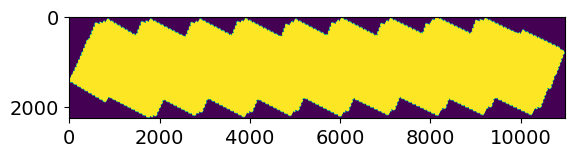

In [5]:
plt.imshow(pseudospectrum_object.maps_dict['hers_act_psw']['masks']['mask']);

In [6]:
pseudospectrum_object.maps_dict['hers_act_psw']['masks'].keys()

dict_keys(['mask', 'blackman'])

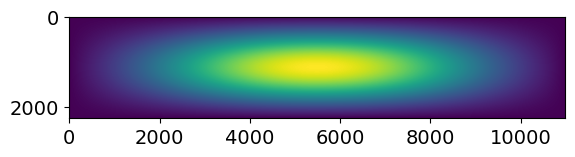

In [7]:
plt.imshow(pseudospectrum_object.maps_dict['hers_act_psw']['masks'][mask]);

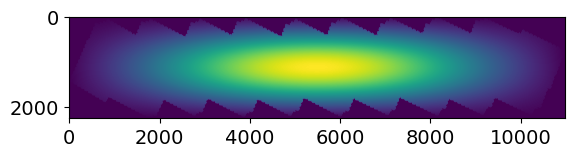

In [8]:
plt.imshow(pseudospectrum_object.maps_dict['hers_act_psw']['masks']['mask']*
           pseudospectrum_object.maps_dict['hers_act_psw']['masks'][mask]);

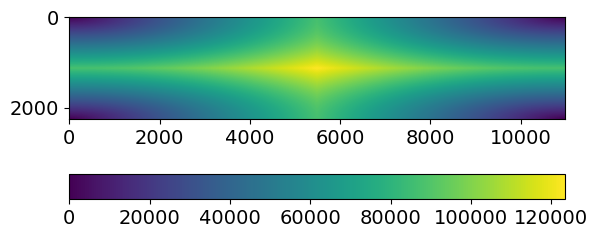

In [9]:
plt.imshow(pseudospectrum_object.maps_dict['hers_act_psw']['kmap']);
plt.colorbar(orientation="horizontal");

In [10]:
# Create MKK
mkk_dict = pseudospectrum_object.get_mkks(iterations=iterations,overwrite=True)

Calculating hers_act_pswxhers_act_pswx1 mkk
Iteration 1/1
Calculating hers_act_pmwxhers_act_pmwx1 mkk
Iteration 1/1
Calculating hers_act_plwxhers_act_plwx1 mkk
Iteration 1/1


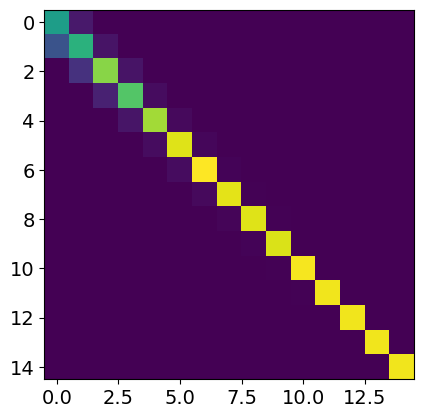

In [11]:
plt.imshow(mkk_dict['hers_act_pswxhers_act_pswx{0:0.0f}'.format(iterations)]);

In [12]:
maps_dict = pseudospectrum_object.maps_dict

In [13]:
pk_dict = pseudospectrum_object.get_pseudospectra(mkk_dict, maps_dict=maps_dict, iterations=iterations, overwrite=True)

> c:\users\viero\repositories\hetdexxhers\pseudospectrum.py(289)get_pseudospectra()
    287                 # compare beamsizes cross_spectra==True is when beam sizes do not match
    288                 pdb.set_trace()
--> 289                 if (itwo == ione) or ((itwo < ione) and cross_spectra == True):
    290                     pk_key = 'X'.join([imap_one, imap_two, str(iterations)])
    291                     ell_key = '__deltal_{0:0.0f}__width_{1:0.2f}'.format(deltal, width).replace('.', 'p')

ipdb> exit


In [ ]:
kmap=pseudospectrum_object.maps_dict['hers_act_psw']['kmap'].copy()
ell=pk_dict['hers_act_pswxhers_act_psw']['ell']
ind_ell = (kmap >= ell[11]) & (kmap < ell[12])
print(np.sum(ind_ell))
kmap[ind_ell] = 0
dims=np.shape(kmap)
plt.imshow(Toolbox.shift_twod(kmap,dims[1]/2,dims[0]/2))
plt.colorbar(orientation="horizontal");

In [ ]:
ell

In [ ]:
pseudospectrum_object.plot_pseudospectra(pk_dict)

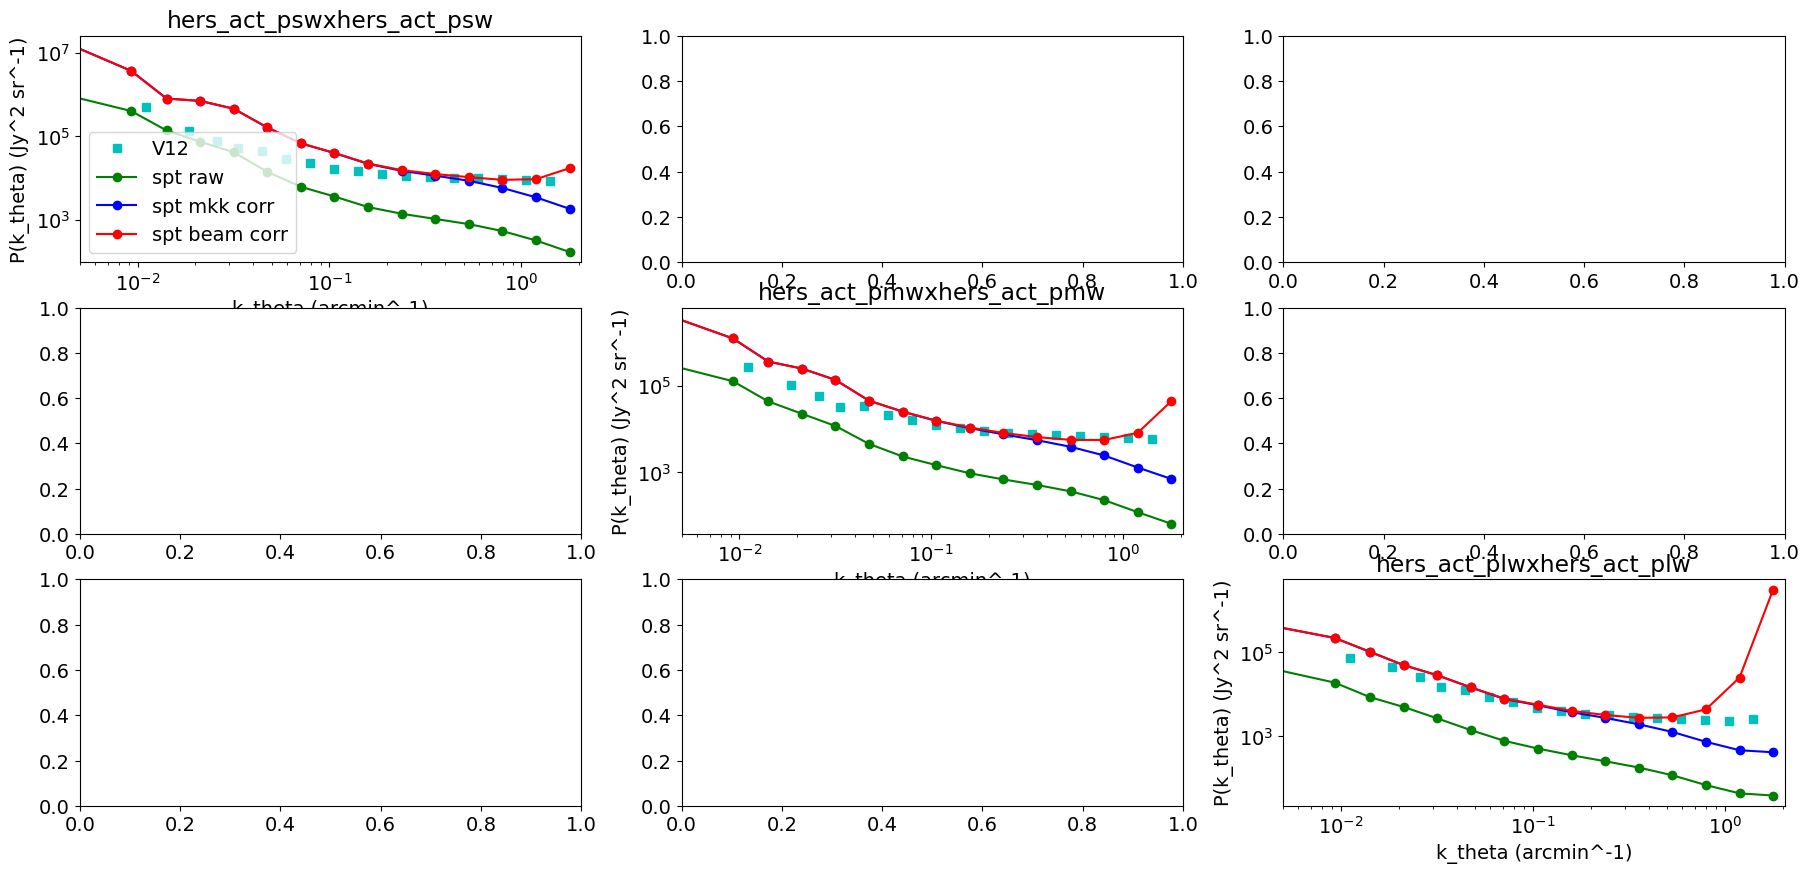

In [16]:
pseudospectrum_object.plot_pseudospectra(pk_dict)

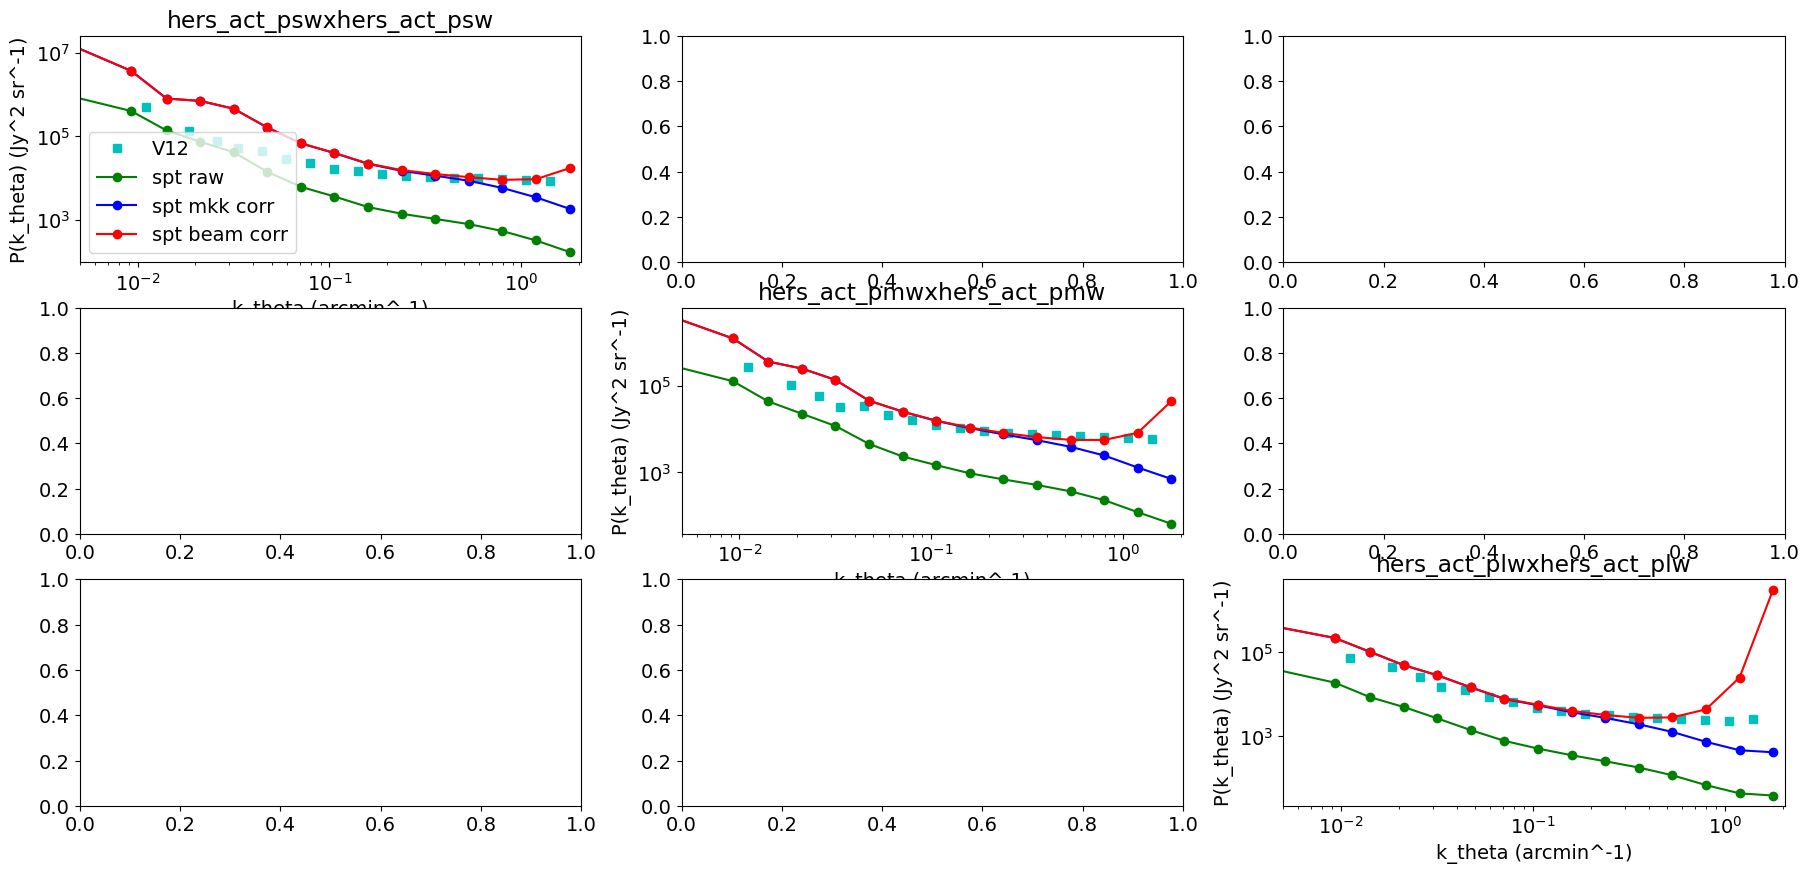

In [16]:
pseudospectrum_object.plot_pseudospectra(pk_dict)